# ECSE 415 Assignment 2, Question 1
### Alex Hale | 260672475 | October 20, 2019

## Invariance of SIFT Features
### 1.1 - Invariance Under Changes in Scale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

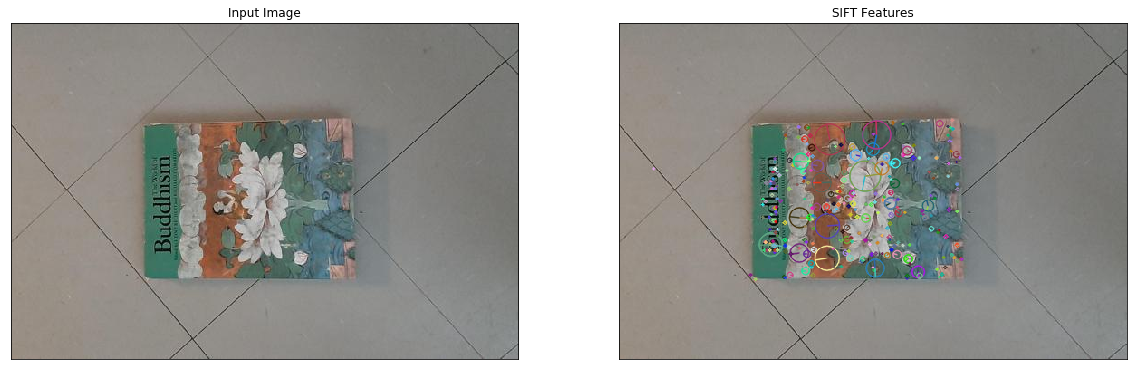

Num keypoints: 385


In [2]:
# Compute SIFT keypoints

# load image and convert to RGB
book = cv2.imread("book.jpg")
book_disp = book.copy()
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
book_disp = cv2.cvtColor(book_disp, cv2.COLOR_BGR2RGB)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoints = sift.detect(book, None)

# draw the keypoints
cv2.drawKeypoints(book, keypoints, book_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(book)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

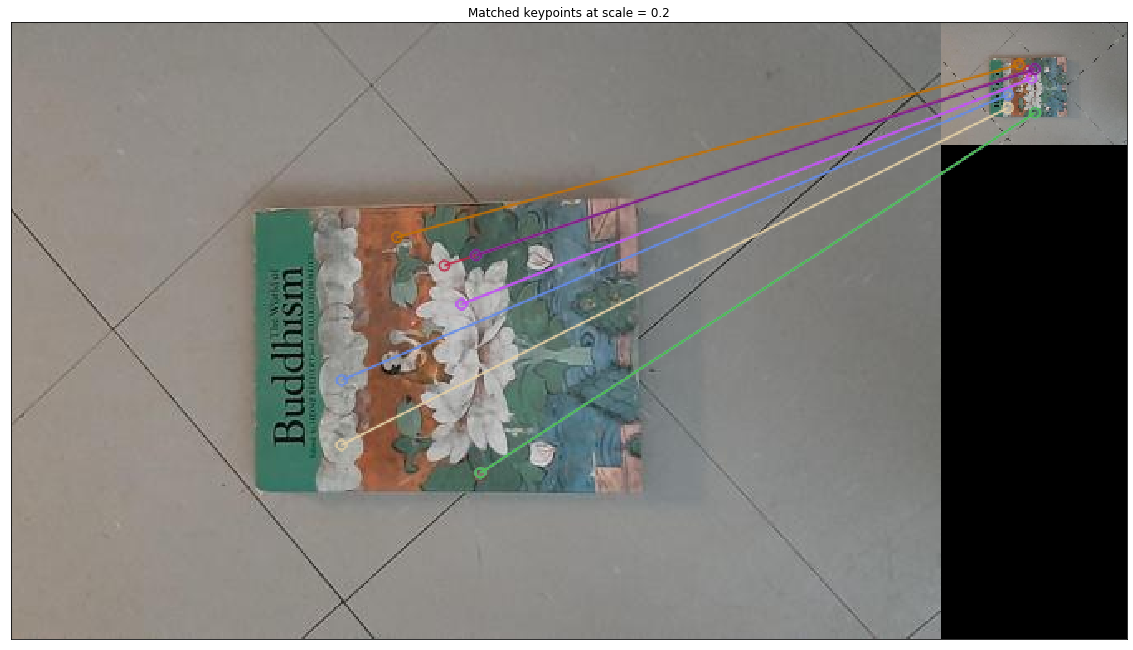

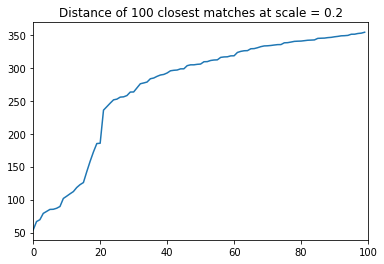

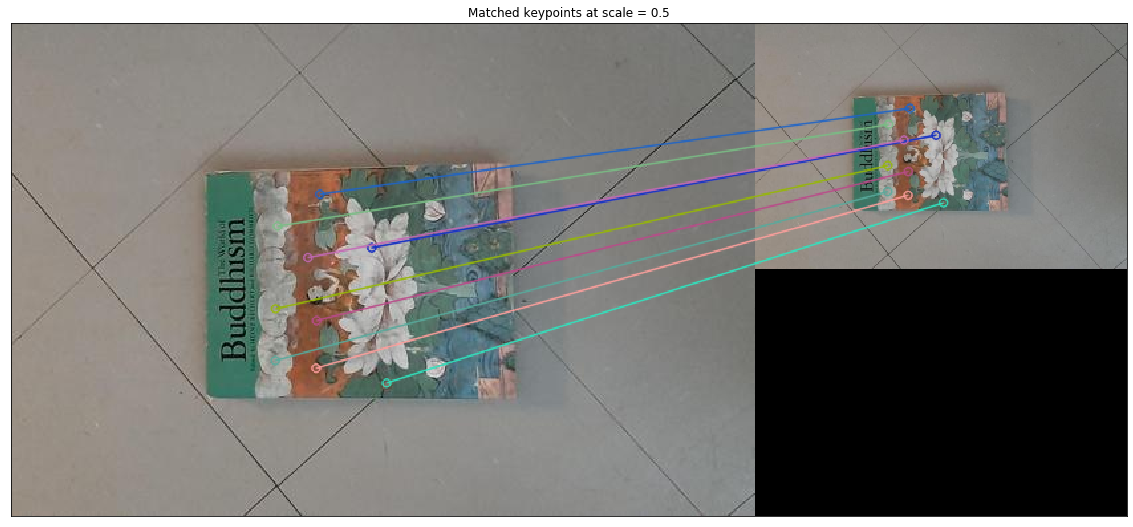

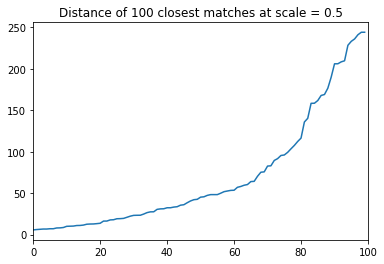

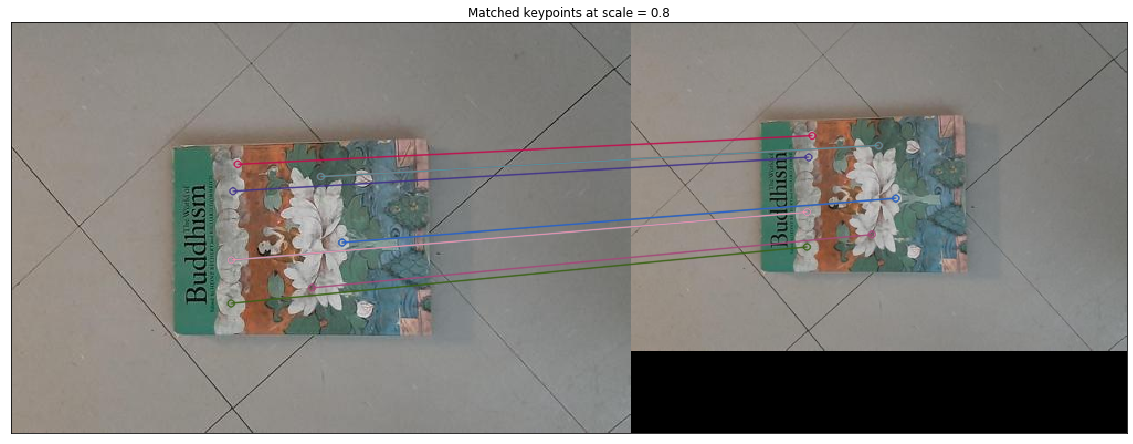

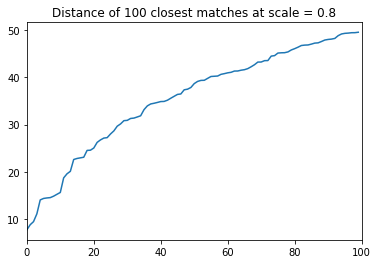

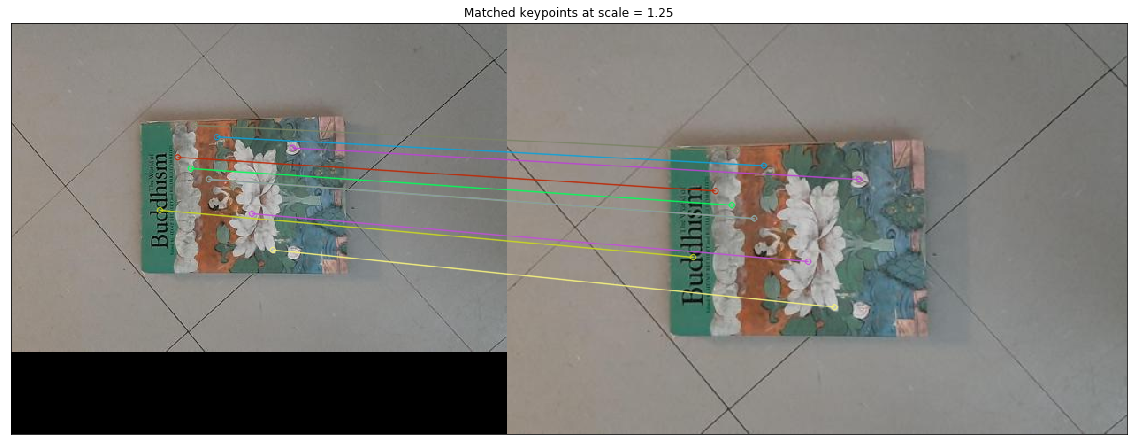

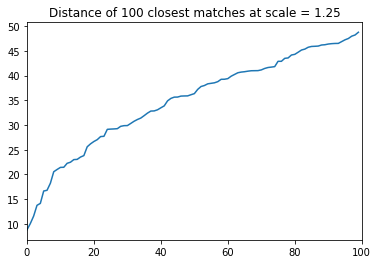

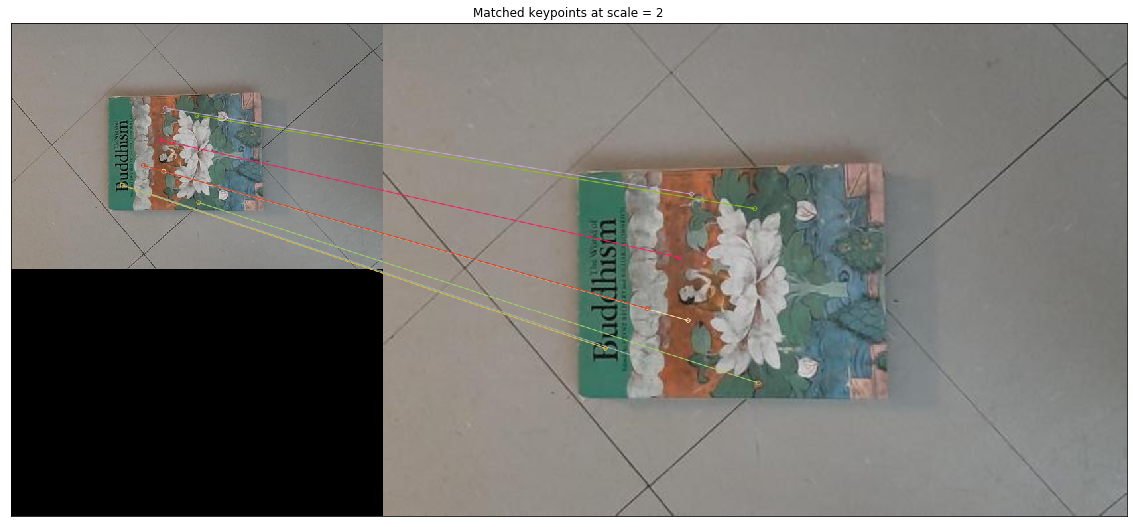

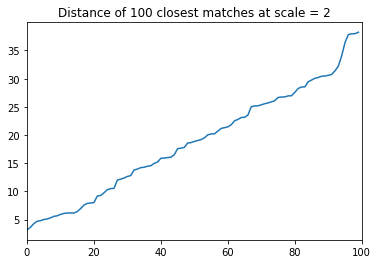

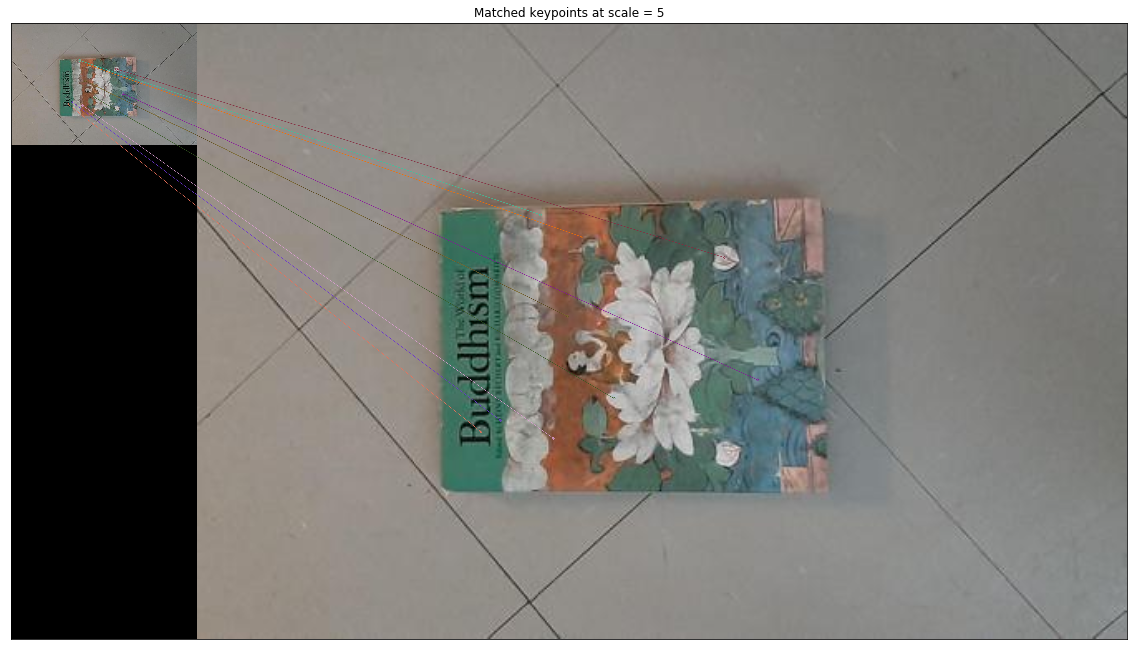

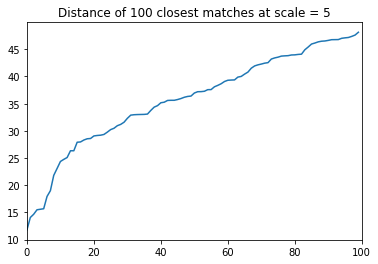

In [3]:
# Scale reference image, then compute SIFT keypoints for the transformed images
bf = cv2.BFMatcher()
keypoints_og,descriptors_og = sift.detectAndCompute(book, None)
scales = [0.2, 0.5, 0.8, 1.25, 2, 5]

for scale in scales:
    book_scaled = cv2.resize(book,None,fx=scale, fy=scale)
    keypoints_sc,descriptors_sc = sift.detectAndCompute(book_scaled, None)

    matches = sorted(bf.match(descriptors_og, descriptors_sc), key = lambda x:x.distance)
    match_lines = cv2.drawMatches(book,keypoints_og,book_scaled,keypoints_sc, matches[:10], None, flags=2)
    
    plt.figure(figsize=(20,20))
    plt.imshow(match_lines)
    plt.title("Matched keypoints at scale = " + str(scale)), plt.xticks([]), plt.yticks([])
    plt.show()
    
    # plot the 100 closest keypoints
    plt.plot([m.distance for m in matches[:100]])
    plt.xlim([0,100]) # set x-axis limit
    plt.title("Distance of 100 closest matches at scale = " + str(scale))
    plt.show()

Increasing the scale from 0.2 to 0.8 has an large improvement on matching distance. Increasing the scale from 0.2 to 0.8 has little to no effect on matching distance. Increasing the scale from 1.25 to 5 has a noticeable improvement on matching difference, but not as significant as the increase from 0.2 to 0.8.

(TODO verify) The matching distance lowers (i.e. improves) as scale increases because the SIFT detector has more pixels to work with when finding features.

### Invariance under Rotation

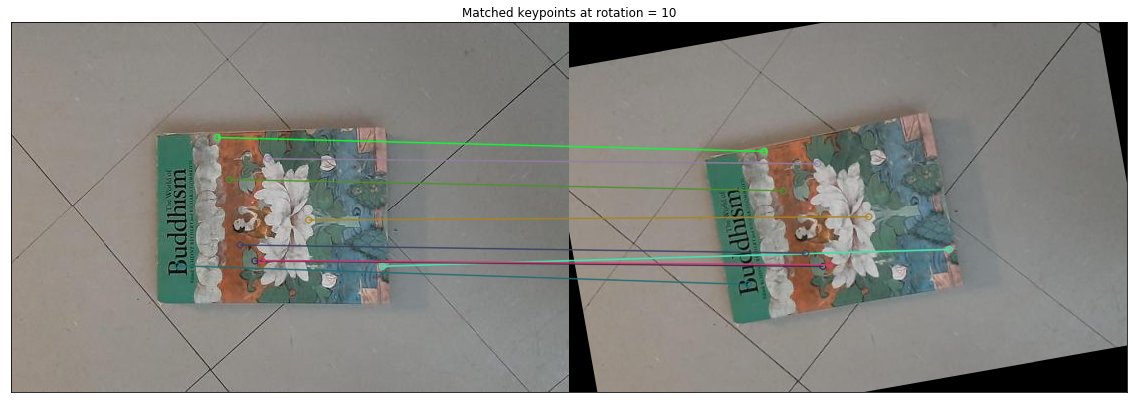

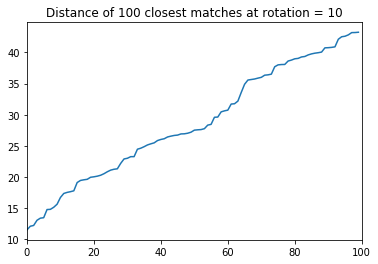

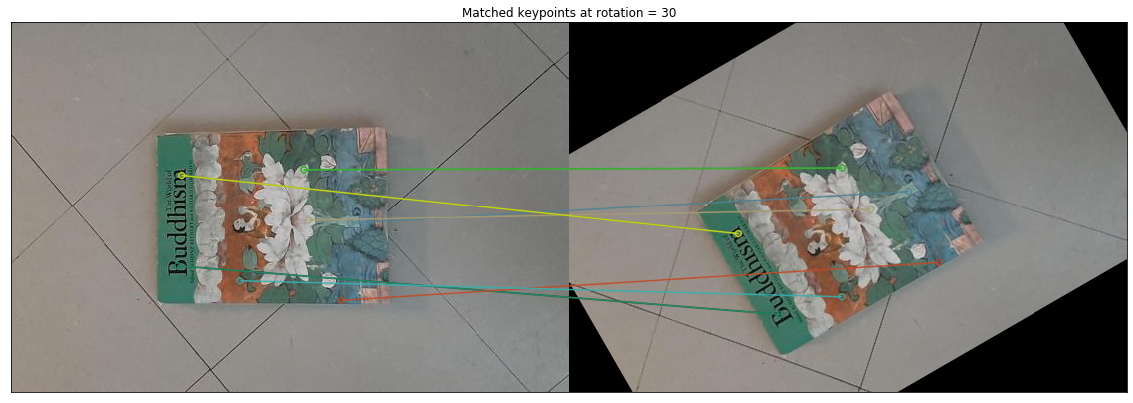

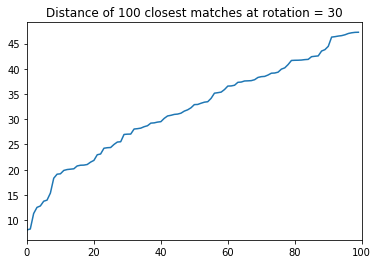

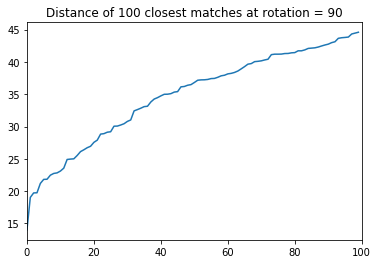

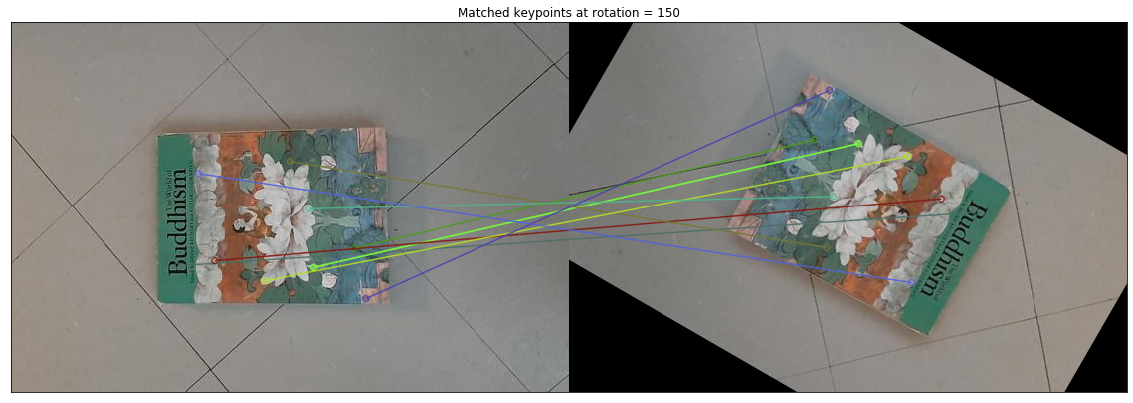

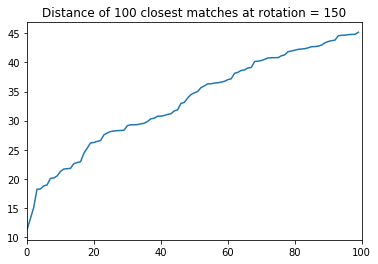

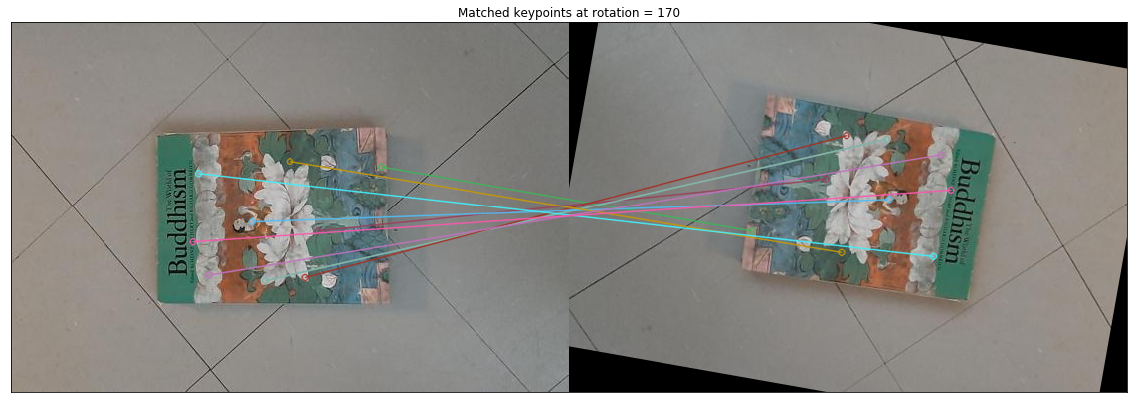

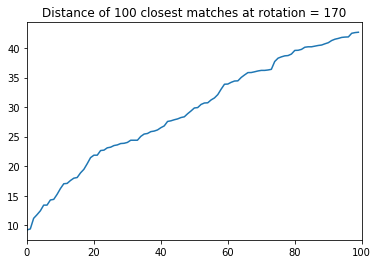

In [4]:
rot = [10,30,90,150,170,180]
height, width = book.shape[0:2]

for r in rot:
    M = cv2.getRotationMatrix2D((width/2,height/2),r,1)
    book_rot = cv2.warpAffine(book,M,(width,height))
    keypoints_sc,descriptors_sc = sift.detectAndCompute(book_rot, None)

    matches = sorted(bf.match(descriptors_og, descriptors_sc), key = lambda x:x.distance)
    match_lines = cv2.drawMatches(book,keypoints_og,book_rot,keypoints_sc, matches[:10], None, flags=2)
    
    plt.figure(figsize=(20,20))
    plt.imshow(match_lines)
    plt.title("Matched keypoints at rotation = " + str(r)), plt.xticks([]), plt.yticks([])
    plt.show()
    
    # plot the 100 closest keypoints
    plt.plot([m.distance for m in matches[:100]])
    plt.xlim([0,100]) # set x-axis limit
    plt.title("Distance of 100 closest matches at rotation = " + str(r))
    plt.show()

Increasing the rotation increases the matching distance until a rotation of 90 degrees, at which point the matching distance drops again, until it reaches 0 at 180 degrees. This means that matching is perfect when the rotated image is aligned on the same axis as thee original image.

(TODO verify) The matching distance is lower (i.e. improved) when the rotated image is more closely aligned to the axis of the original image because the orientation vectors of the SIFT features are closer together.